Loaded 10000 lines from navajo10k.txt with label 0
Loaded 10000 lines from icelandic10k.txt with label 1
Loaded 1300 lines from lingala1k.txt with label 2
Loaded 9988 lines from wolof10k.txt with label 3
Loaded 10000 lines from czech10k.txt with label 4
Loaded 10000 lines from polish10k.txt with label 5
Loaded 10000 lines from manx10k.txt with label 6
Loaded 1002 lines from fulah10k.txt with label 7
Loaded 10000 lines from yoruba10k.txt with label 8
Combined data shape: (72290, 2)


/Users/ivoryang/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Vectorized data with 5000 features
Data split into 57832 training and 14458 test samples
Classifier training complete
Models saved successfully.
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.99      0.99      0.99      1989
           2       0.99      0.97      0.98       265
           3       1.00      0.99      0.99      2023
           4       0.97      0.95      0.96      2028
           5       0.96      0.98      0.97      1970
           6       0.99      0.99      0.99      1974
           7       0.96      0.92      0.94       219
           8       0.99      0.98      0.99      2010

    accuracy                           0.98     14458
   macro avg       0.98      0.97      0.98     14458
weighted avg       0.98      0.98      0.98     14458



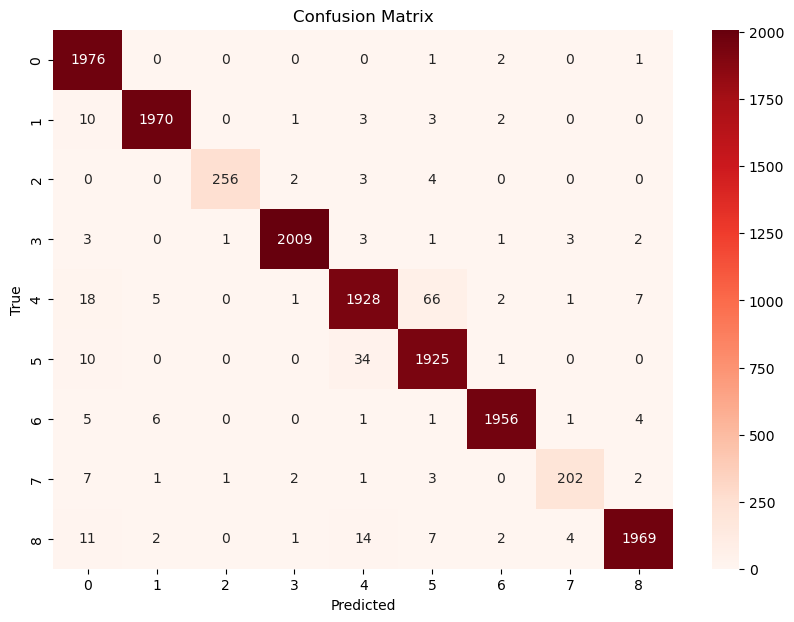

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load

# Named tokenizer function for vectorization
def tokenize(text):
    return text.split()

# Function to load data from text files
def load_data(file_path, label):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    data = pd.DataFrame(lines, columns=['text'])
    data['label'] = label
    print(f"Loaded {len(data)} lines from {file_path} with label {label}")
    return data

# Combine datasets and prepare for training
def prepare_data(*datasets):
    combined_data = pd.concat(datasets).reset_index(drop=True)
    print(f"Combined data shape: {combined_data.shape}")
    return combined_data

# Tokenize and vectorize text data
def preprocess_data(data):
    vectorizer = TfidfVectorizer(tokenizer=tokenize, max_features=5000)
    X = vectorizer.fit_transform(data['text'].str.strip())  # Stripping whitespace from each text entry
    y = data['label']
    print(f"Vectorized data with {X.shape[1]} features")
    return X, y, vectorizer

# Splitting data into training and testing sets
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Data split into {X_train.shape[0]} training and {X_test.shape[0]} test samples")
    return X_train, X_test, y_train, y_test

# Training the classifier
def train_classifier(X_train, y_train):
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train, y_train)
    print("Classifier training complete")
    return classifier

# Evaluating the classifier
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)
    
    # Compute and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
#     plt.savefig('confusion_matrix.png')
    # Saving the plot to a file
    plt.savefig('confusionmat.pdf', bbox_inches='tight')  # Save the plot as a PDF file
    plt.show()

if __name__ == "__main__":
    # Load data from text files with unique labels for each language
    navajo_data = load_data('navajo10k.txt', 0)
    icelandic_data = load_data('icelandic10k.txt', 1)
    lingala_data = load_data('lingala1k.txt', 2)
    wolof_data = load_data('wolof10k.txt', 3)
    czech_data = load_data('czech10k.txt', 4)
    polish_data = load_data('polish10k.txt', 5)
    manx_data = load_data('manx10k.txt', 6)
    fulah_data = load_data('fulah10k.txt', 7)
    yoruba_data = load_data('yoruba10k.txt', 8)

    # Combine all datasets
    all_data = prepare_data(navajo_data, icelandic_data, lingala_data, wolof_data, czech_data, polish_data, manx_data, fulah_data, yoruba_data)

    # Preprocess the combined data
    X, y, vectorizer = preprocess_data(all_data)

    # Split the data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train the classifier
    classifier = train_classifier(X_train, y_train)

    # Save the models
    dump(vectorizer, 'tfidf_vectorizer.joblib')
    dump(classifier, 'random_forest_classifier.joblib')
    print("Models saved successfully.")

    # Load the models (if needed for future use)
    vectorizer = load('tfidf_vectorizer.joblib')
    classifier = load('random_forest_classifier.joblib')

    # Evaluate the classifier
    evaluate_classifier(classifier, X_test, y_test)


In [2]:
from joblib import dump, load

# After training your vectorizer and classifier
dump(vectorizer, 'tfidf_vectorizer.joblib')
dump(classifier, 'random_forest_classifier.joblib')
print("Models saved successfully.")

Models saved successfully.


In [3]:
from joblib import load
import pandas as pd

# Function to load data from CSV file
def load_data_from_csv(file_path):
    data = pd.read_csv(file_path)
    print(f"Loaded {len(data)} lines from {file_path}")
    return data

# Load the trained models
vectorizer = load('tfidf_vectorizer.joblib')
classifier = load('random_forest_classifier.joblib')

# Load the new data
data_to_classify = load_data_from_csv('apacheset.csv')

# Function to preprocess and vectorize new data using the loaded vectorizer
def preprocess_data(vectorizer, data):
    X = vectorizer.transform(data['Sentences'].astype(str))  # Ensure text is treated as string
    print(f"Vectorized data with {X.shape[1]} features")
    return X

# Preprocess and classify the loaded data
X_to_classify = preprocess_data(vectorizer, data_to_classify)
predicted_labels = classifier.predict(X_to_classify)

# Display predicted labels
data_to_classify['predicted_labels'] = predicted_labels
print(data_to_classify[['Sentences', 'predicted_labels']])


Loaded 107 lines from apacheset.csv
Vectorized data with 5000 features
                                             Sentences  predicted_labels
0    Áídí’ Jesus Holy Spirit nabiłaago da’igolı́ı̨́...                 0
1    Dá doo iyáné dizdin behiskąą, áí ąął hiskąądá’...                 0
2    Na’íntaahíí baa nyáágo gábiłṉii, Ni Bik’ehgo’i...                 8
3    Áídá’ Jesus gábiłṉii, Ágágolzeego k’e’eshchįį,...                 0
4    Ch’iidn nant’án godiyįhgo ízisgo kįh gozṉilyú ...                 0
..                                                 ...               ...
102    bìyá tì' jò ní bìnàtsé kè s jò ní' bìdlùk jò ní                 4
103     bínà lzé' 'í t' à' dá' jò dí dò bé' ó ltà' gò'                 8
104                      yèxáidèlà gò dè yà tc' ìndí d                 0
105  ìs' à' nà yái k' è' gòjó gò' nànt' à' dòxá yò'...                 0
106                      yèxáidèlà gò dè yà tc' ìndí d                 0

[107 rows x 2 columns]


In [4]:
# from joblib import load
# import pandas as pd

# # Function to load data from CSV file
# def load_data_from_csv(file_path):
#     data = pd.read_csv(file_path)
#     print(f"Loaded {len(data)} lines from {file_path}")
#     return data

# # Load the trained models
# vectorizer = load('tfidf_vectorizer.joblib')
# classifier = load('random_forest_classifier.joblib')

# # Load the new data
# data_to_classify = load_data_from_csv('s3.csv')

# # Function to preprocess and vectorize new data using the loaded vectorizer
# def preprocess_data(vectorizer, data):
#     X = vectorizer.transform(data['Sentences'].astype(str))  # Ensure text is treated as string
#     print(f"Vectorized data with {X.shape[1]} features")
#     return X

# # Preprocess and classify the loaded data
# X_to_classify = preprocess_data(vectorizer, data_to_classify)
# predicted_labels = classifier.predict(X_to_classify)

# # Interpret the results as 'Navajo' or 'not Navajo'
# data_to_classify['Is_Navajo'] = (predicted_labels == 0)  # True if Navajo, False otherwise

# # Display results
# print(data_to_classify[['Sentences', 'Is_Navajo']])


In [5]:
# # Save to CSV
# data_to_classify[['Sentences', 'Is_Navajo']].to_csv("DataOutput.csv", index=False)

# # Optionally, you can inform the user
# print("Data saved to 'DataOutput.csv'.")


In [6]:
import pandas as pd
from joblib import load

# Function to load data from CSV file
def load_data_from_csv(file_path):
    data = pd.read_csv(file_path)
    print(f"Loaded {len(data)} lines from {file_path}")
    return data

# Load the trained models
vectorizer = load('tfidf_vectorizer.joblib')
classifier = load('random_forest_classifier.joblib')

# Load the new data
data_to_classify = load_data_from_csv('apacheset.csv')

# Function to preprocess and vectorize new data using the loaded vectorizer
def preprocess_data(vectorizer, data):
    X = vectorizer.transform(data['Sentences'].astype(str))  # Ensure text is treated as string
    print(f"Vectorized data with {X.shape[1]} features")
    return X

# Preprocess and classify the loaded data
X_to_classify = preprocess_data(vectorizer, data_to_classify)
predicted_labels = classifier.predict(X_to_classify)

# Interpret the results as 'Navajo' or 'not Navajo'
data_to_classify['Is_Navajo'] = (predicted_labels == 0)  # Assuming 0 indicates Navajo, adjust if necessary

# Count the proportion of 'Navajo' predictions per Apache language
proportions_by_language = data_to_classify.groupby('Language')['Is_Navajo'].agg(['mean', 'count'])
proportions_by_language.columns = ['Percentage_True', 'Total_Sentences']
proportions_by_language['Percentage_True'] *= 100  # Convert to percentage

# Display results
print(proportions_by_language)

# Optional: Print the DataFrame with predictions
print(data_to_classify[['Sentences', 'Language', 'Is_Navajo']])


Loaded 107 lines from apacheset.csv
Vectorized data with 5000 features
                  Percentage_True  Total_Sentences
Language                                          
Jicarilla Apache        92.307692               13
Lipan Apache            62.162162               37
Mescalero Apache       100.000000               32
Western Apache          96.000000               25
                                             Sentences        Language  \
0    Áídí’ Jesus Holy Spirit nabiłaago da’igolı́ı̨́...  Western Apache   
1    Dá doo iyáné dizdin behiskąą, áí ąął hiskąądá’...  Western Apache   
2    Na’íntaahíí baa nyáágo gábiłṉii, Ni Bik’ehgo’i...  Western Apache   
3    Áídá’ Jesus gábiłṉii, Ágágolzeego k’e’eshchįį,...  Western Apache   
4    Ch’iidn nant’án godiyįhgo ízisgo kįh gozṉilyú ...  Western Apache   
..                                                 ...             ...   
102    bìyá tì' jò ní bìnàtsé kè s jò ní' bìdlùk jò ní    Lipan Apache   
103     bínà lzé' 'í t' à' dá' 